# EDA

In [1]:
# import necessary packages
import warnings
warnings.simplefilter(action='ignore')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# read train set as a pandas dataframe
train_set = pd.read_csv('data/train_set.csv')
train_set.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,54,F,1,Unknown,Single,Unknown,Blue,36,1,3,3,3723.0,1728,1995.0,0.595,8554,99,0.678,0.464
1,Attrited Customer,58,F,4,High School,Married,Unknown,Blue,48,1,4,3,5396.0,1803,3593.0,0.493,2107,39,0.393,0.334
2,Existing Customer,45,F,4,Unknown,Single,Less than $40K,Gold,36,6,1,3,15987.0,1648,14339.0,0.732,1436,36,1.250,0.103
3,Existing Customer,34,F,2,Graduate,Single,Less than $40K,Blue,36,4,3,4,3625.0,2517,1108.0,1.158,2616,46,1.300,0.694
4,Existing Customer,49,F,2,High School,Married,$40K - $60K,Blue,39,5,3,4,2720.0,1926,794.0,0.602,3806,61,0.794,0.708


## Frequency Distribuition

In [3]:
# create functions to do the frequency distribuition
def barplot(figsize, title, data, x, y, xlabel, ylabel):
    '''Function to plot bar graphs to analyze the qualitative features'''
    # Plot the graph
    plt.figure(figsize=figsize)

    # Title
    plt.title(title, fontsize = 14)

    # Graph
    sns.barplot(data = data, x = x, y = y, 
                ci = None, palette = "Blues_d")

    # Label
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.savefig('images/eda/output_qualitative_' + xlabel + '.png')
    plt.show()


def frequency_quantitative_table(df, X, hist=False):
    '''Function that create frequency tables for quantitatives features.
    The number of classes are defined by sturges rule.
    
    :param df: (dataframe) 
    DataFrame that you are working.
    
    :param X: (series)
    Respective column that you want to analyze the frequencies.
    
    :param hist: (bool)
    Parameter that controls if the function return a histogram with boxplot to help in your analysis
    
    :return: (dataframe)
    Final dataframe with the resumed table. This table has the ollowing information:
    observed frequency, relative frequency and cumulated relative frequency. If param hist=True
    the function returns a histogram and boxplot to help in your analysis.
    '''
    # sturges rule to find a good number of classes
    n = df.shape[0]
    k = int(round(1 + (10/3) * np.log10(n), 0))

    # observed frequency for the variable
    observed_frequency = pd.value_counts(
        pd.cut(
            x = df[X],
            bins = k,
            include_lowest = True
        ),
        sort = False
    )

    # relative frequency for the variable
    relative_frequency = pd.value_counts(
        pd.cut(
            x = df[X],
            bins = k,
            include_lowest = True
        ),
        sort = False,
        normalize = True
    )
    relative_frequency = round(relative_frequency * 100, 1)

    # frequency table
    freq_dist_quant = pd.DataFrame(
        {'Observed Frequency': observed_frequency, 'Relative Frequency (%)': relative_frequency}
    )

    # add cumulative relative frequency
    freq_dist_quant['Cumulated Relative Frequency (%)'] = freq_dist_quant['Relative Frequency (%)'].cumsum()
    
    # optional thing that can show for you the histogram of the variable
    if hist==True:
        # calculate measures of central tendency
        mean = df[X].mean()
        median = df[X].median()
        # mode = df[X].mode()[0]

        # plot of boxplot and histogram
        fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, figsize = (20,7), gridspec_kw= {"height_ratios": (0.2, 1)})

        sns.boxplot(data=df, x=X, ax=ax_box)
        ax_box.set_title('Distribution of the respective variable' , size=18)
        ax_box.axvline(mean, color='r', linestyle='--')
        ax_box.axvline(median, color='g', linestyle='-')
        # ax_box.axvline(mode, color='y', linestyle='-')
        ax_box.set(xlabel='')

        sns.histplot(data=df, x=X, ax=ax_hist, kde=True, bins=k)
        ax_hist.axvline(mean, color='r', linestyle='--', label="Mean")
        ax_hist.axvline(median, color='g', linestyle='-', label="Median")
        # ax_hist.axvline(mode, color='y', linestyle='-', label="Mode")
        
        ax_hist.legend()

        plt.tight_layout()
        
    return freq_dist_quant

### Qualitative variables

The qualitative variables are:
* Attrition_Flag
* Gender
* Dependent_count
* Education_Level	
* Marital_Status
* Income_Category
* Card_Category
* Total_Relationship_Count	
* Months_Inactive_12_mon
* Contacts_Count_12_mon

In [4]:
# call a list with qualitative variables
qualitative_variables = [
    'Attrition_Flag',
    'Gender',
    'Dependent_count',
    'Education_Level',
    'Marital_Status',
    'Income_Category',
    'Card_Category',
    'Total_Relationship_Count',	
    'Months_Inactive_12_mon',
    'Contacts_Count_12_mon'
]

The variable that we are analyzing is: Attrition_Flag


,Frequency,Percentage (%)
Existing Customer,6801,83.952598
Attrited Customer,1300,16.047402


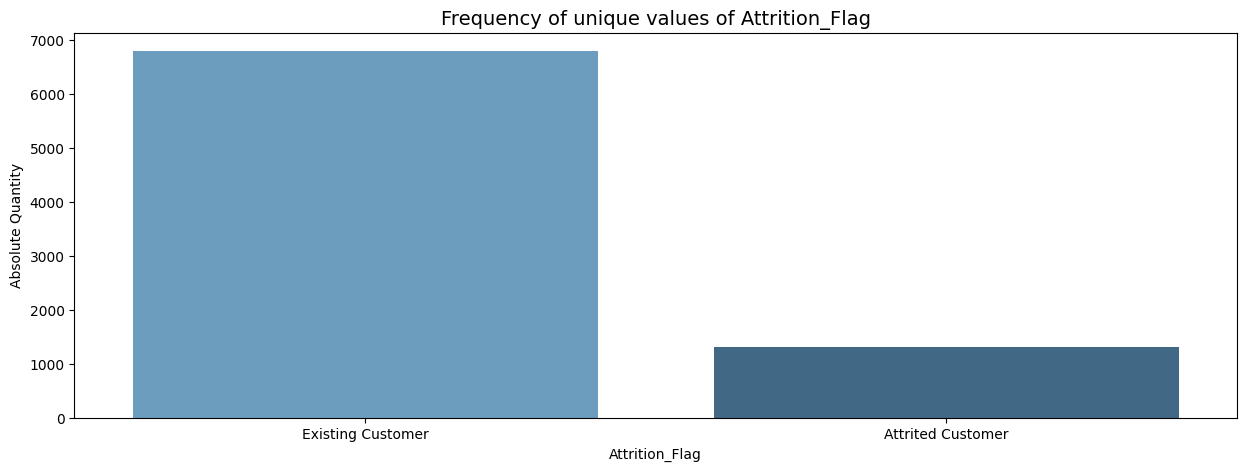

------------------------------------------------------------------------------------------
The variable that we are analyzing is: Gender


,Frequency,Percentage (%)
F,4279,52.820639
M,3822,47.179361


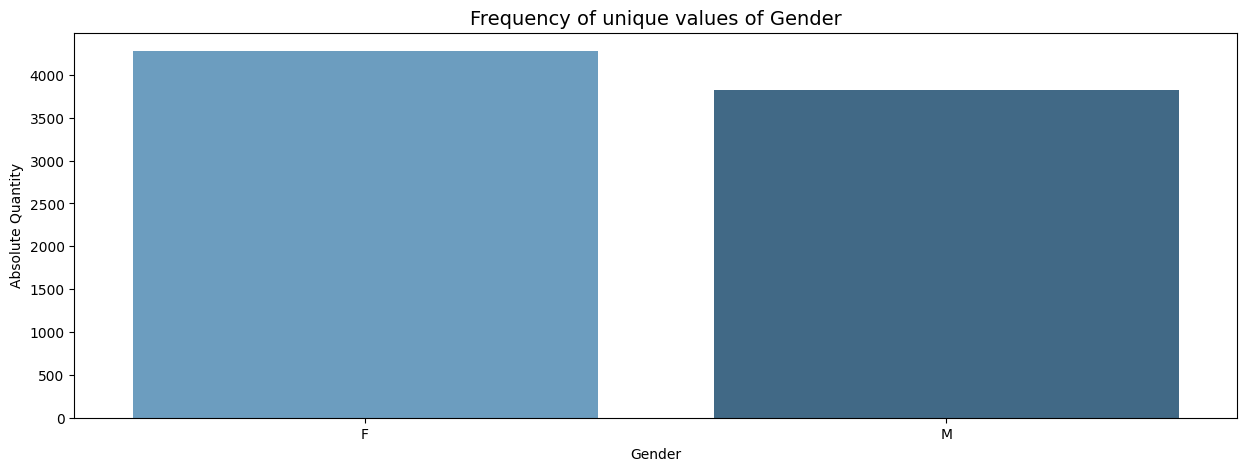

------------------------------------------------------------------------------------------
The variable that we are analyzing is: Dependent_count


,Frequency,Percentage (%)
3,2222,27.428713
2,2150,26.539933
1,1465,18.084187
4,1212,14.961116
0,725,8.949512
5,327,4.036539


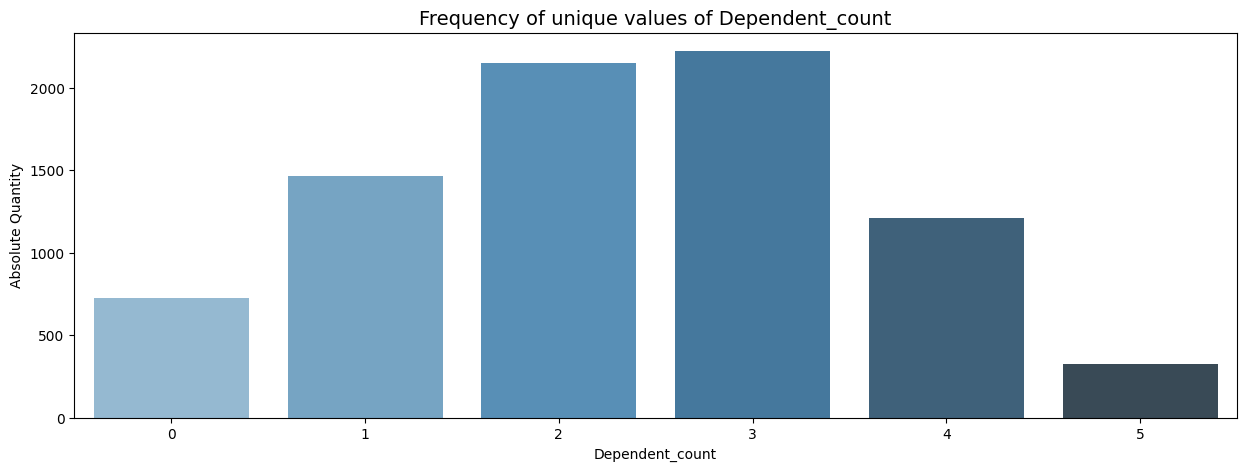

------------------------------------------------------------------------------------------
The variable that we are analyzing is: Education_Level


,Frequency,Percentage (%)
Graduate,2528,31.206024
High School,1619,19.985187
Unknown,1205,14.874707
Uneducated,1171,14.455006
College,816,10.072831
Post-Graduate,407,5.024071
Doctorate,355,4.382175


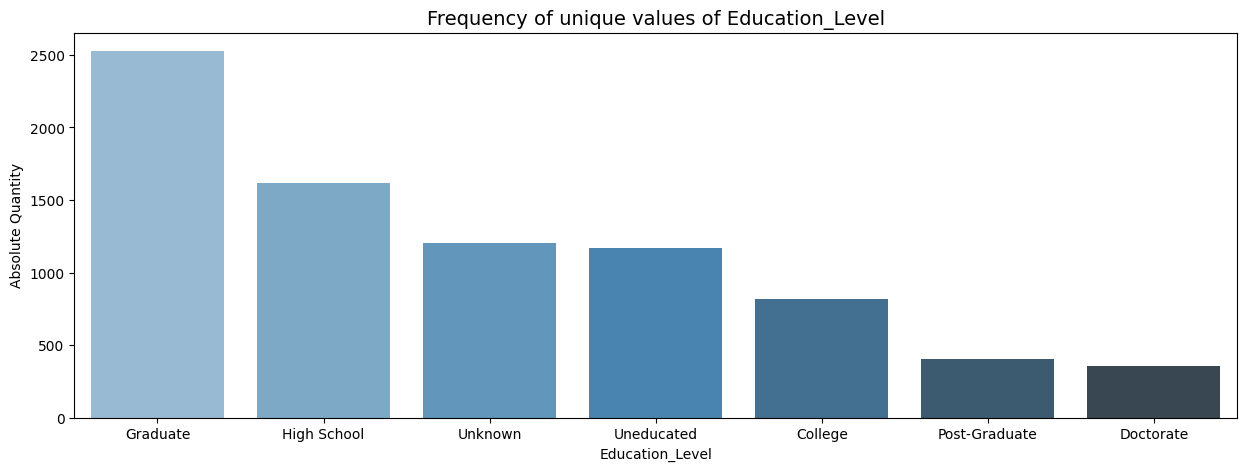

------------------------------------------------------------------------------------------
The variable that we are analyzing is: Marital_Status


,Frequency,Percentage (%)
Married,3767,46.500432
Single,3144,38.810023
Divorced,611,7.542279
Unknown,579,7.147266


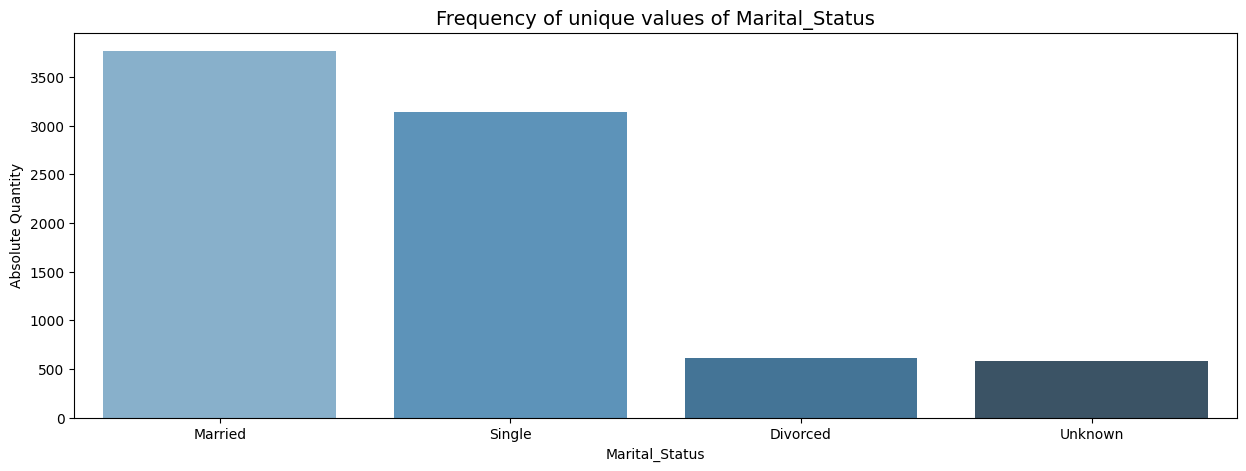

------------------------------------------------------------------------------------------
The variable that we are analyzing is: Income_Category


,Frequency,Percentage (%)
Less than $40K,2812,34.711764
$40K - $60K,1453,17.936057
$80K - $120K,1237,15.269720
$60K - $80K,1122,13.850142
Unknown,889,10.973954
$120K +,588,7.258363


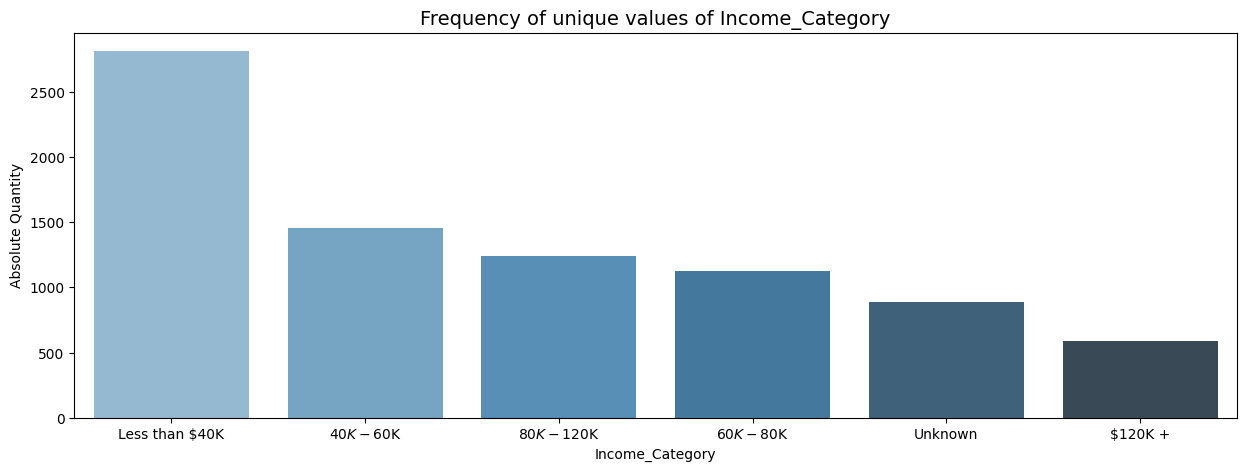

------------------------------------------------------------------------------------------
The variable that we are analyzing is: Card_Category


,Frequency,Percentage (%)
Blue,7557,93.284780
Silver,436,5.382052
Gold,93,1.148006
Platinum,15,0.185162


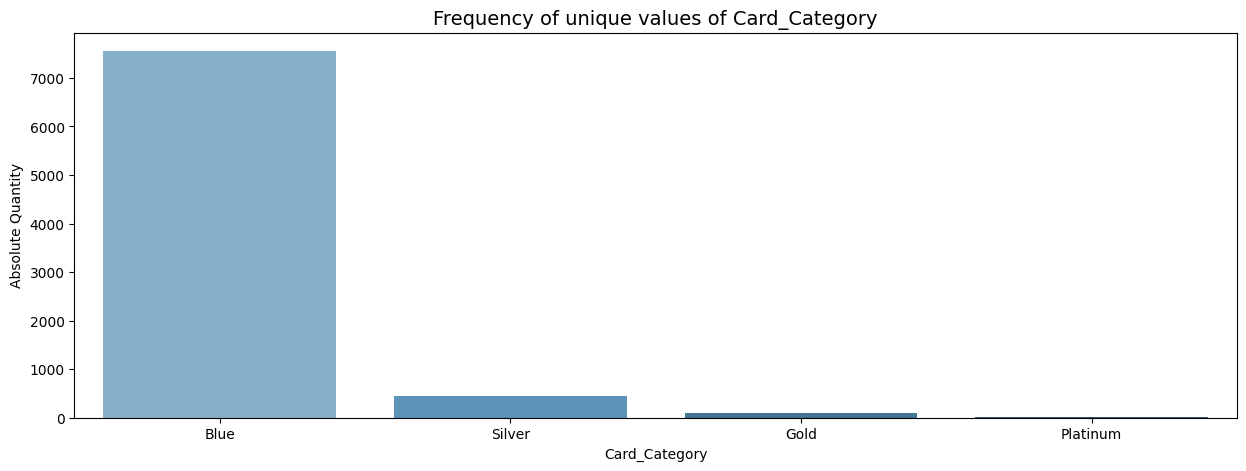

------------------------------------------------------------------------------------------
The variable that we are analyzing is: Total_Relationship_Count


,Frequency,Percentage (%)
3,1852,22.861375
4,1539,18.997655
5,1511,18.652018
6,1488,18.368103
2,985,12.158993
1,726,8.961857


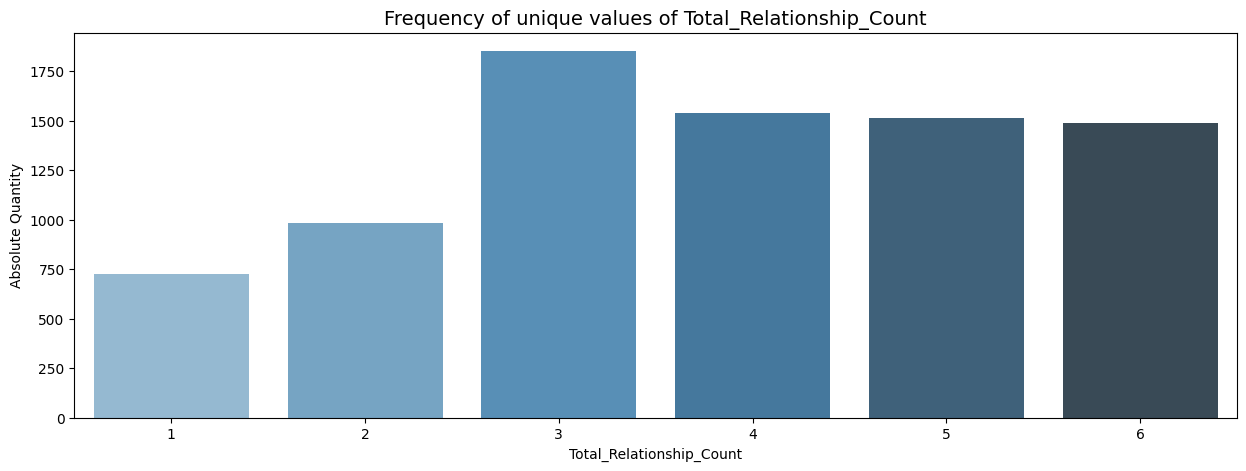

------------------------------------------------------------------------------------------
The variable that we are analyzing is: Months_Inactive_12_mon


,Frequency,Percentage (%)
3,3094,38.192816
2,2611,32.230589
1,1780,21.972596
4,346,4.271078
5,144,1.777558
6,104,1.283792
0,22,0.271571


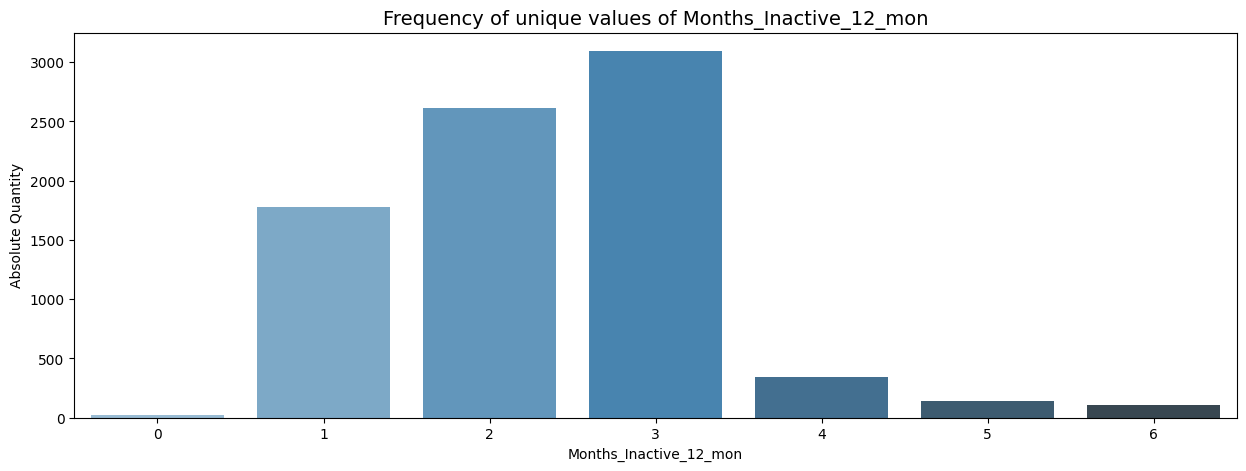

------------------------------------------------------------------------------------------
The variable that we are analyzing is: Contacts_Count_12_mon


,Frequency,Percentage (%)
3,2716,33.526725
2,2596,32.045426
1,1207,14.899395
4,1092,13.479817
0,312,3.851376
5,133,1.641773
6,45,0.555487


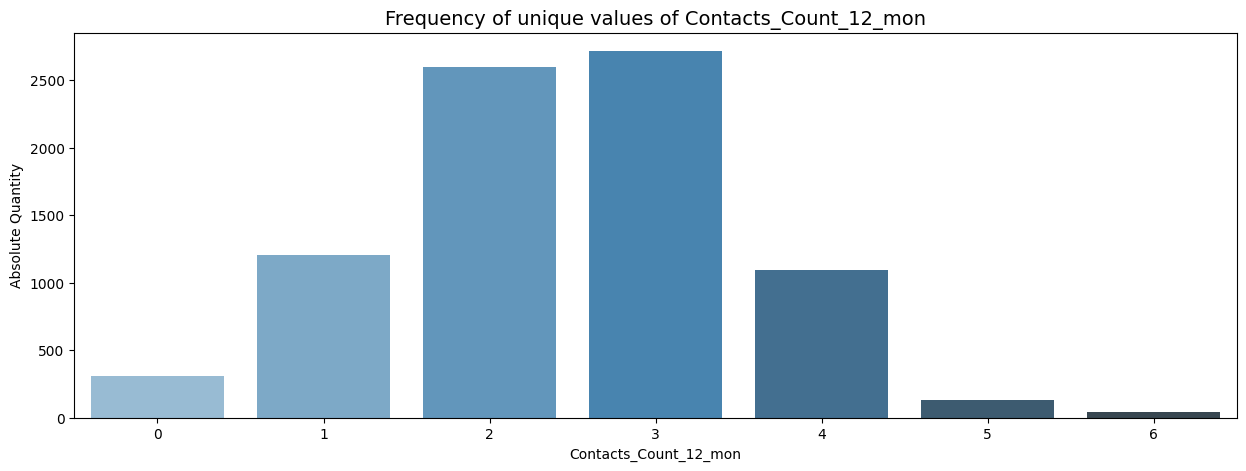

------------------------------------------------------------------------------------------


In [5]:
# plot frequency tables and bar graphs for every qualitative variable
for var in qualitative_variables:
    print('The variable that we are analyzing is:', var)
    # 1. creating the table
    var_frequency = train_set[var].value_counts()
    var_percentage = train_set[var].value_counts(normalize = True) * 100

    var_frequency_table = pd.DataFrame({'Frequency': var_frequency, 'Percentage (%)': var_percentage})
    display(var_frequency_table)

    # 2. plot the bar graph
    barplot(
        (15, 5), 'Frequency of unique values of ' + var, train_set, 
        train_set[var].value_counts().index, train_set[var].value_counts(),
        var, 'Absolute Quantity'
    )
    print('------------------------------------------------------------------------------------------')

### Quantitative variables

The quantitative variables are:
* Customer_Age
* Months_on_book
* Credit_Limit
* Total_Revolving_Bal	
* Avg_Open_To_Buy	
* Total_Amt_Chng_Q4_Q1
* Total_Trans_Amt
* Total_Trans_Ct
* Total_Ct_Chng_Q4_Q1
* Avg_Utilization_Ratio